In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False

# 绽放反应  
绽放反应由草种子造成，由于触发条件的不同分为**绽放**、**超绽放**、**烈绽放**，属于元素反应中的剧变反应。  
其中草种子绽放造成的伤害根据草种子的生成者数据进行计算。例如在[纳+妮+卡]队伍中(下面公式测试3)，由于纳西妲战技影响，敌人身上一直存在草元素，种子通常由后手妮露水产生，卡维战技或元素爆发造成的草种子爆炸依然由妮露的数据进行计算。  
而草种子超绽放与烈绽放())则是由触发反应的雷元素和火元素的生成者数据进行计算。如下面公式测试1

## 伤害计算公式  
$$反应基础伤害 * 等级系数 * 反应基础倍率 * (1 + \frac{16*精通}{2000+精通} + 反应伤害提升) * 抗性系数 * 额外收益$$

- 等级系数：角色等级当然越高越好
- 反应基础倍率：绽放 : 超/烈绽放 = 2 : 3
- 反应伤害提升：如花海四件套效果、妮露固有天赋效果、深渊BUFF加成,包括其他各种加成(其中精通所带来的加成也属于它,但是对于玩家来说比较重要,因此独立出来)
- 额外收益：如草神2命带来的暴击期望
- 抗性系数:  
$$抗性系数 = \begin{cases}
1 - \frac{抗性}{2} ,& 抗性<0 \\
1 - 抗性 ,& 0 <=抗性<0.75 \\
\frac{1}{1+ 4 * 抗性} ,& 抗性>=0.75 \\
\end{cases}$$

### 公式测试1:「久岐忍」+「纳西妲」超绽放 
![测试角色1](../asset/image/genshin/bloom_test_characters1.png)  
超绽放反应89级时的`反应基础伤害 * 等级系数 * 反应基础倍率 = 1405.10 * 3`  
久岐忍战斗状态下精通为`892.30 = 702.30 + 150 + 40`(饰金4 +150精通场景下)  
在纳家做客时`1117.8 = 892.30 + 902.00 * 0.25`  
纳西妲命座二效果: 固定的10%暴击,100%暴击伤害  
测试靶子: 海乱鬼-公义全元素抗性`10%`  
纳西妲深林套四件效果: 草属性抗性`-30%`  
抗性系数为`1.1`  
伤害计算如下:  

In [2]:
damageTestTable = [
    ['基础不暴击', 1405.10 * 3 * (1 + (16 * 892.30/(2000 + 892.30))) * 1.1],
    ['基础暴击', 1405.10 * 3 * (1 + (16 * 892.30/(2000 + 892.30))) * 1.1 * 2],
    ['智慧殿堂下不暴击', 1405.10 * 3 * (1 + (16 * 1117.8/(2000 + 1117.8))) * 1.1],
    ['智慧殿堂下暴击', 1405.10 * 3 * (1 + (16 * 1117.8/(2000 + 1117.8))) * 1.1 * 2]
]

print(tabulate(damageTestTable, floatfmt='.3f', tablefmt='github'))

|------------------|-----------|
| 基础不暴击       | 27524.876 |
| 基础暴击         | 55049.751 |
| 智慧殿堂下不暴击 | 31235.322 |
| 智慧殿堂下暴击   | 62470.643 |


#### 实测结果
![实测结果1](../asset/image/genshin/bloom_test_result_1.jpg)  

### 公式测试2:「妮露」+「纳西妲」绽放  
![测试角色2](../asset/image/genshin/bloom_test_characters2.png)  
绽放反应80级时的`反应基础伤害 * 等级系数 * 反应基础倍率 = 1077.44 * 2`  
妮露战斗状态下精通为`309.629 = 119.629 + 50 + 40`(饰金4 +50精通场景下)  
妮露天赋加成`0.33453 = (33717 - 30000) / 1000 * 0.09`  
纳西妲命座二效果: 固定的10%暴击,100%暴击伤害  
测试靶子: 海乱鬼-公义全元素抗性`10%`  
纳西妲深林套四件效果: 草属性抗性`-30%`  
抗性系数为`1.1`  
伤害计算如下:  

In [3]:
damageTest2Table = [
    ['基础不暴击', 1077.44 * 2 *
        (1 + (16 * 309.629/(2000 + 309.629)) + 0.33453) * 1.1],
    ['基础暴击', 1077.44 * 2 *
        (1 + (16 * 309.629/(2000 + 309.629)) + 0.33453) * 1.1 * 2],
]

print(tabulate(damageTest2Table, floatfmt='.3f', tablefmt='github'))

|------------|-----------|
| 基础不暴击 |  8247.674 |
| 基础暴击   | 16495.348 |


#### 实测结果
![实测结果2](../asset/image/genshin/bloom_test_result_2.jpg)  

### 公式测试3:「卡维」+「妮露」+「纳西妲」绽放  
在测试2的前提下增加卡维  
妮露战斗状态下精通为`359.629 = 119.629 + 100 + 40`(饰金4 +100精通场景下)  
卡维1级元素爆发繁绘隅穹加成`27.5%`  
伤害计算如下:  

In [4]:
damageTest3Table = [
    ['基础不暴击', 1077.44 * 2 *
        (1 + (16 * 359.629/(2000 + 359.629)) + 0.33453) * 1.1],
    ['基础暴击', 1077.44 * 2 *
        (1 + (16 * 359.629/(2000 + 359.629)) + 0.33453) * 1.1 * 2],
    ['繁绘隅穹时不暴击', 1077.44 * 2 *
        (1 + (16 * 359.629/(2000 + 359.629)) + 0.33453 + 0.275) * 1.1],
    ['繁绘隅穹时暴击', 1077.44 * 2 *
        (1 + (16 * 359.629/(2000 + 359.629)) + 0.33453 + 0.275) * 1.1 * 2],
]

print(tabulate(damageTest3Table, floatfmt='.3f', tablefmt='github'))

|------------------|-----------|
| 基础不暴击       |  8943.579 |
| 基础暴击         | 17887.158 |
| 繁绘隅穹时不暴击 |  9595.430 |
| 繁绘隅穹时暴击   | 19190.860 |


#### 实测结果
![实测结果3](../asset/image/genshin/bloom_test_result_3.jpg)  

In [5]:
def simpleEFBloom(em, bm):
    return 1447 * 3 * (1 + (16 * em/(2000 + em)) + bm) * 1.1


def simpleWBloom(em, bm):
    return 1447 * 2 * (1 + (16 * em/(2000 + em)) + bm) * 1.1

## 精通收益与圣遗物  

### 公式与精通有关的部分  
$$\frac{16*精通}{2000+精通}$$

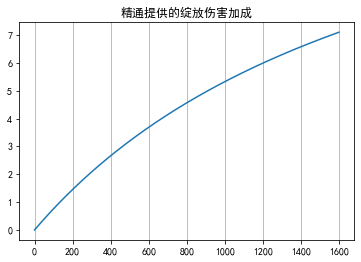

In [6]:
x = np.arange(0, 1600)
plt.plot(x, (16*x)/(2000+x))
plt.grid(axis='x')
plt.title('精通提供的绽放伤害加成')
plt.show()

因乐园套增加反应伤害,于是带上反应伤害加成

$$\frac{16*精通}{2000+精通} + 反应伤害加成$$

以发射器的圣遗物选择精精精(主词条187*3), 武器(4星武器铁峰刺)精通165为例  

- 精通2+2:  
$$精通 = 165 + 80 * 2 + 187 * 3 + 其他精通$$

In [7]:
# 精通2+2
def eFn1(otherEm):
    return 165 + 80*2 + 187*3 + otherEm

- 饰金: 二件套+80 四件套+150(每个不同属性队友+50,按全部不同计算。注:双草共鸣可给全队加成最大100精通,有条件可以上双草)
$$精通 = 165 + 80 + 150 + 187 * 3 + 其他精通$$

In [8]:
# 饰金2个不同属性队友
def eFn2(otherEm):
    return 165 + 80 + 100 + 187*3 + otherEm
# 饰金3个不同属性队友


def eFn3(otherEm):
    return 165 + 80 + 150 + 187*3 + otherEm

- 乐园(花神):  
$$精通 = 165 + 80 + 187 * 3 + 其他精通$$
$$反应伤害 = 0.4 * (1 + 0.25 * n) \quad \forall n\in{0,1,2,3,4}$$

In [9]:
# 乐园
def eFn4(otherEm):
    return 165 + 80 + 187*3 + otherEm

### 圣遗物副词条精通上下限

| 初始值 | 追加1 | 追加2 | 追加3 | 追加4 | 追加5 |
|---|---|---|----|----|----|
| 16 19 21 32 | 32-46 | 48-69 | 64-92 | 80-115 | 96-138 |

### 按照副词条提供的精通,不同套装提供的加成

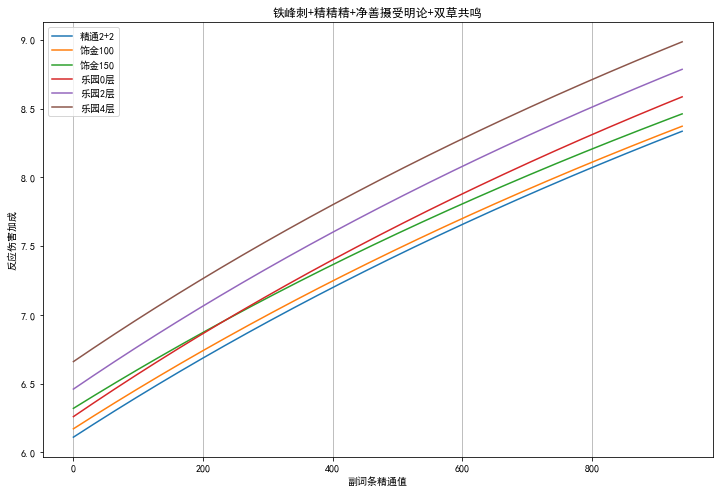

In [10]:
# 副词条 + 草神净善摄受明论250 + 双草100
subEm = np.arange(0, 250 + 138 * 5)
em1 = eFn1(subEm + 250 + 100)
em2 = eFn2(subEm + 250 + 100)
em3 = eFn3(subEm + 250 + 100)
em4 = eFn4(subEm + 250 + 100)
plt.figure(figsize=(plt.rcParams['figure.figsize']
           [0] * 2, plt.rcParams['figure.figsize'][1] * 2))
plt.plot(subEm, (16 * em1)/(2000 + em1), label='精通2+2')
plt.plot(subEm, (16 * em2)/(2000 + em2), label='饰金100')
plt.plot(subEm, (16 * em3)/(2000 + em3), label='饰金150')
plt.plot(subEm, (16 * em4)/(2000 + em4) + 0.4, label='乐园0层')
plt.plot(subEm, (16 * em4)/(2000 + em4) + 0.6, label='乐园2层')
plt.plot(subEm, (16 * em4)/(2000 + em4) + 0.8, label='乐园4层')
plt.xlabel('副词条精通值')
plt.ylabel('反应伤害加成')
plt.title('铁峰刺+精精精+净善摄受明论+双草共鸣')
plt.legend()
plt.grid(axis='x')
plt.show()

#### 副词条250 草神大招250 双草100, 各套装加成差距

In [11]:
em3001 = eFn1(250 + 250 + 100)
em3002 = eFn2(250 + 250 + 100)
em3003 = eFn3(250 + 250 + 100)
em3004 = eFn4(250 + 250 + 100)
dm3001 = (16 * em3001)/(2000 + em3001)
dm3002 = (16 * em3002)/(2000 + em3002)
dm3003 = (16 * em3003)/(2000 + em3003)
dm30040 = (16 * em3004)/(2000 + em3004) + 0.4
dm30042 = (16 * em3004)/(2000 + em3004) + 0.6
dm30044 = (16 * em3004)/(2000 + em3004) + 0.8
dm300Table = [
    ['精通2+2', None, dm3002 - dm3001, dm3003 - dm3001,
        dm30040 - dm3001, dm30042 - dm3001, dm30044 - dm3001],
    ['饰金100', dm3001 - dm3002, None, dm3003 - dm3002,
        dm30040 - dm3002, dm30042 - dm3002, dm30044 - dm3002],
    ['饰金150', dm3001 - dm3003, dm3002 - dm3003, None,
        dm30040 - dm3003, dm30042 - dm3003, dm30044 - dm3003],
    ['乐园0层', dm3001 - dm30040, dm3002 - dm30040, dm3003 -
        dm30040, None, dm30042 - dm30040, dm30044 - dm30040],
    ['乐园2层', dm3001 - dm30042, dm3002 - dm30042, dm3003 -
        dm30042, dm30040 - dm30042, None, dm30044 - dm30042],
    ['乐园4层', dm3001 - dm30044, dm3002 - dm30044, dm3003 -
        dm30044, dm30040 - dm30044, dm30042 - dm30044, None],
]
print(tabulate(dm300Table, ['', '精通2+2', '饰金100', '饰金150',
      '乐园0层', '乐园2层', '乐园4层'], floatfmt='.3f', tablefmt='github'))

|         |   精通2+2 |   饰金100 |   饰金150 |   乐园0层 |   乐园2层 |   乐园4层 |
|---------|-----------|-----------|-----------|-----------|-----------|-----------|
| 精通2+2 |           |     0.052 |     0.181 |     0.184 |     0.384 |     0.584 |
| 饰金100 |    -0.052 |           |     0.128 |     0.132 |     0.332 |     0.532 |
| 饰金150 |    -0.181 |    -0.128 |           |     0.004 |     0.204 |     0.404 |
| 乐园0层 |    -0.184 |    -0.132 |    -0.004 |           |     0.200 |     0.400 |
| 乐园2层 |    -0.384 |    -0.332 |    -0.204 |    -0.200 |           |     0.200 |
| 乐园4层 |    -0.584 |    -0.532 |    -0.404 |    -0.400 |    -0.200 |           |


## 妮绽放

### 固有天赋 翩舞永世之梦  
基于妮露的生命值上限超过30000部分，每1000生命值将使处于「金杯的丰馈」状态下的角色，绽放反应伤害提升9%，至多提升400%
$$ 0.4 = \frac{n - 30000}{1000} * 0.009$$

In [12]:
print(4 * 1000 / 0.09 + 30000)

74444.44444444444



### 妮露生命值计算
**需求: >74444.45HP**  

| 加成方式(全满级) | 生命加成 |
|---|---|
| 基础生命值 | 15184(+28.8%等级突破加成) |
| 圣遗物主属性-花 | 4780 |
| 圣遗物主属性-杯 | 46.6% |
| 圣遗物主属性-沙 | 46.6% |
| 圣遗物主属性-冠 | 46.6% |
| 圣遗物2件套-千岩 | 20% |
| 圣遗物2件套-花海 | 20% |
| 双水共鸣 | 25% |
| 武器副属性-圣显之钥 | 66.15% |
| 圣遗物副词条-百分比 | a% |
| 圣遗物副词条-数值 | b |

#### 圣遗物副词条生命上下限

| 初始值 | 追加1 | 追加2 | 追加3 | 追加4 | 追加5 |
|---|---|---|---|---|---|
| 4.1% 4.7% 5.3% 5.8% | 8.2%-11.6% | 12.3%-17.4% | 16.4%-23.2% | 20.5%-29% | 24.6%-34.8% |
| 209 239 269 299 | 418-598 | 627-897 | 836-1196 | 1045-1495 | 1254-1794 |

In [13]:
# expect
expectHp = 74444.45

baseHp = 15184 + 4780

# 0+1 2+2
hp1 = baseHp * (1 + 0.25 + 0.6615 + 0.2 + 0.466 * 3 + 0.2 * 2)
# 0+1 2+0
hp2 = baseHp * (1 + 0.25 + 0.6615 + 0.2 + 0.466 * 3 + 0.2)
# 0+1
hp3 = baseHp * (1 + 0.25 + 0.6615 + 0.2 + 0.466 * 3)
# 0+0 2+2
hp4 = baseHp * (1 + 0.25 + 0.466 * 3 + 0.2 * 2)
# 0+0 2+0
hp5 = baseHp * (1 + 0.25 + 0.466 * 3 + 0.2)
# 0+0
hp6 = baseHp * (1 + 0.25 + 0.466 * 3)
# 磐岩结绿 2+2
hp7 = baseHp * (1 + 0.25 + 0.2 + 0.466 * 3 + 0.2 * 2)
# 磐岩结绿 2+0
hp8 = baseHp * (1 + 0.25 + 0.2 + 0.466 * 3 + 0.2)
# 磐岩结绿
hp9 = baseHp * (1 + 0.25 + 0.2 + 0.466 * 3)

hpTable = [
    ['双水 生生生 生命2+2 专武', hp1, None, None],
    ['双水 生生生 生命2 专武', hp2, (expectHp - hp2)/baseHp * 100,
     (expectHp - hp2)/baseHp/5 * 100],
    ['双水 生生生 专武', hp3, (expectHp - hp3)/baseHp * 100,
     (expectHp - hp3)/baseHp/5 * 100],
    ['双水 生生生 生命2+2', hp4, (expectHp - hp4)/baseHp * 100,
     (expectHp - hp4)/baseHp/5 * 100],
    ['双水 生生生 生命2', hp5, (expectHp - hp5)/baseHp * 100,
     (expectHp - hp5)/baseHp/5 * 100],
    ['双水 生生生', hp6, (expectHp - hp6)/baseHp * 100,
     (expectHp - hp6)/baseHp/5 * 100],
    ['双水 生生生 磐岩结绿[1] 生命2+2', hp7,
        (expectHp - hp7)/baseHp * 100, (expectHp - hp7)/baseHp/5 * 100],
    ['双水 生生生 磐岩结绿[1] 生命2', hp8, (expectHp - hp8) /
     baseHp * 100, (expectHp - hp8)/baseHp/5 * 100],
    ['双水 生生生 磐岩结绿[1]', hp9, (expectHp - hp9)/baseHp *
     100, (expectHp - hp9)/baseHp/5 * 100]
]
print(tabulate(hpTable, headers=[
      '加成方式', 'HP', '需求副词条生命%', '平均需求副词条生命%'], floatfmt='.2f', tablefmt='github'))

| 加成方式                        |       HP |   需求副词条生命% |   平均需求副词条生命% |
|---------------------------------|----------|-------------------|-----------------------|
| 双水 生生生 生命2+2 专武        | 78049.26 |                   |                       |
| 双水 生生生 生命2 专武          | 74056.46 |              1.94 |                  0.39 |
| 双水 生生生 专武                | 70063.66 |             21.94 |                  4.39 |
| 双水 生生生 生命2+2             | 60850.27 |             68.09 |                 13.62 |
| 双水 生生生 生命2               | 56857.47 |             88.09 |                 17.62 |
| 双水 生生生                     | 52864.67 |            108.09 |                 21.62 |
| 双水 生生生 磐岩结绿[1] 生命2+2 | 64843.07 |             48.09 |                  9.62 |
| 双水 生生生 磐岩结绿[1] 生命2   | 60850.27 |             68.09 |                 13.62 |
| 双水 生生生 磐岩结绿[1]         | 56857.47 |             88.09 |                 17.62 |


妮露单水情况下产种子不足,通常都带双水,且专武提升恐怖。在专武情况下可选择的圣遗物较多, 无专武情况下可能需要生命2+2或生命2+精通2的搭配。  

### 妮绽放中的生命与精通
#### 在无法满足天赋生命上限的情况下,选择生命2还是精通2
**通常选择生命2**,因为天赋是对全队种子的增伤,而精通仅妮露触发种子绽放时才会有增伤效果。  
增伤计算:  
$$妮露精通2增伤 = \frac{16*(精通 + 80)}{2000+精通 + 80} - \frac{16*精通}{2000+精通}$$
$$\begin{split}
妮露生命2增伤 &= \frac{生命 + (15184 + 4780) * 0.2 - 30000}{10000} * 0.09 - \frac{生命 - 30000}{10000} * 0.09 \\
&= 0.359352
\end{split}$$

#### 在还未满足天赋生命上限的情况下,选择生命2还是精通2

**通常选择生命2**,因为天赋是对全队种子的增伤,而精通仅妮露触发种子绽放时才会有增伤效果。  
增伤计算:  
$$妮露精通2增伤 = \frac{16*(精通 + 80)}{2000+精通 + 80} - \frac{16*精通}{2000+精通}$$
$$\begin{split}
妮露生命2增伤 &= \frac{生命 + (15184 + 4780) * 0.2 - 30000}{10000} * 0.09 - \frac{生命 - 30000}{10000} * 0.09 \\
&= 0.359352
\end{split}$$

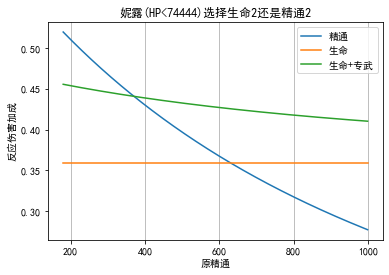

In [14]:
oEm = np.arange(180, 1000)
plt.plot(oEm, (16 * (oEm + 80))/(2000 + oEm + 80) -
         (16 * oEm)/(2000 + oEm), label='精通')
plt.plot(oEm, np.repeat(0.359352, oEm.size), label='生命')
plt.plot(oEm, (16 * (oEm + 14.374))/(2000 + oEm + 14.374) -
         (16 * oEm)/(2000 + oEm) + 0.359352, label='生命+专武')
plt.grid(axis='x')
plt.xlabel('原精通')
plt.ylabel('反应伤害加成')
plt.title('妮露(HP<74444)选择生命2还是精通2')
plt.legend()
plt.show()

**那对于圣遗物主词条187精通与46.6%生命呢?**  

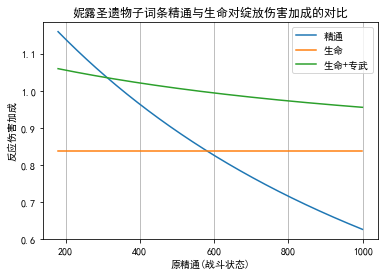

In [15]:
oEm = np.arange(180, 1000)
plt.plot(oEm, (16 * (oEm + 187))/(2000 + oEm + 187) -
         (16 * oEm)/(2000 + oEm), label='精通')
plt.plot(oEm, np.repeat((15194 + 4780) * 0.466 /
         1000 * 0.09, oEm.size), label='生命')
plt.plot(oEm, (16 * (oEm + 33.4916))/(2000 + oEm + 33.4916) - (16 * oEm) /
         (2000 + oEm) + (15194 + 4780) * 0.466 / 1000 * 0.09, label='生命+专武')
plt.grid(axis='x')
plt.xlabel('原精通(战斗状态)')
plt.ylabel('反应伤害加成')
plt.title('妮露圣遗物子词条精通与生命对绽放伤害加成的对比')
plt.legend()
plt.show()

由于生命十分好堆叠,生命带来的收益又会给整个队伍的绽放反应带来提升,精通的收益越来越低,建议:优先考虑满足固有天赋的生命上限74444.45

#### 无专武妮绽放(双水、生生生、生命2+2)
双水、生生生、生命2+2 还需圣遗物副词条+68.09%(平均每个圣遗物+13.62%)生命值。如有磐岩结绿,则仅需+48.09%(+9.62%)。
如带铁峰刺或东花坊时雨则增加165精通。 
##### 场景: 双水双草 使用165精通4星武器 圣遗物副词条优先生命满足74445
- 妮露精通`165 + 100 + 80 + 副词条精通 (+ 250)`

In [16]:
nDamageTest1Table = [
    ['无精通副词条不暴击', simpleWBloom(345, 4)],
    ['无精通副词条暴击', simpleWBloom(345, 4) * 2],
    ['智慧殿堂下不暴击', simpleWBloom(595, 4)],
    ['智慧殿堂下暴击', simpleWBloom(595, 4) * 2]
]

print(tabulate(nDamageTest1Table, floatfmt='.3f', tablefmt='github'))

|--------------------|-----------|
| 无精通副词条不暴击 | 23410.547 |
| 无精通副词条暴击   | 46821.094 |
| 智慧殿堂下不暴击   | 27595.600 |
| 智慧殿堂下暴击     | 55191.201 |


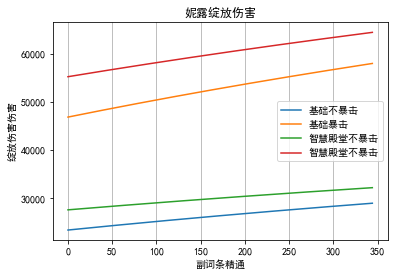

In [17]:
nTest2SubEm = np.arange(0, 69 * 5)
nTest2Y1 = simpleWBloom(345 + nTest2SubEm, 4)
nTest2Y2 = nTest2Y1 * 2
nTest2Y3 = simpleWBloom(345 + 250 + nTest2SubEm, 4)
nTest2Y4 = nTest2Y3 * 2
plt.plot(nTest2SubEm, nTest2Y1, label='基础不暴击')
plt.plot(nTest2SubEm, nTest2Y2, label='基础暴击')
plt.plot(nTest2SubEm, nTest2Y3, label='智慧殿堂不暴击')
plt.plot(nTest2SubEm, nTest2Y4, label='智慧殿堂不暴击')
plt.grid(axis='x')
plt.xlabel('副词条精通')
plt.ylabel('绽放伤害伤害')
plt.legend()
plt.title('妮露绽放伤害')
plt.show()

以上仅计算妮露触发绽放的伤害，因对中妮露并不战场产种也较少,所以也适用于其他角色(如❤)触发反应的效果。

#### 专武妮绽放
可以选择的圣遗物更多：饰金4 乐园4 精通2+2, 甚至还可以水伤。有专武情况下妮露只加血量(2+2 生生生),最少有`78049.26`血量,可给队友加成至少`156 ≈ 78049.26 * 0.002`精通。

#### 其他角色驻场输出
如果是心海或芭芭拉站场,一般需要在有一定治疗的情况下兼顾输出。战斗时的附加精通(妮露天赋 + 妮露专武 + 双草共鸣 (+ 智慧殿堂))`336(586) = 100 + 156 + 80 (+ 250)`。场景如下:  
- 妮露 0+1
- 纳西妲 0+0  
- 战斗时的附加精通(妮露天赋 + 妮露专武 + 双草共鸣 + 智慧殿堂)`+586`
- 武器: 金箔 生命值`+41.3%`
- 武器: 祭礼 精通`+221`
- 圣遗物:少女 治疗`+15% + 20%`
- 圣遗物:海染 治疗`+15%`
- 圣遗物:饰金 精通`+80 + 100`
- 圣遗物:乐园 精通`+80` 绽放伤害加成`+40%(80%)`
- 圣遗物主词条: 生生治
- 圣遗物主词条: 生精治
- 圣遗物主词条: 精精治
- 圣遗物主词条: 精精精
- 以副词条无精通和生命加成来计算

In [18]:
# info {label, eHpRate, eHealRate, eem, bm}

bwTestWInfos1 = [
    ['金珀', 0.413, 0, 0, 0],
    ['祭礼', 0, 0, 221, 0],
]
bwTestRInfos1 = [
    ['少女', 0, 0.15 + 0.2, 0, 0],
    ['海染', 0, 0.15, 0, 0],
    ['饰金', 0, 0, 80 + 100, 0],
    ['乐园', 0, 0, 80, 0.8],
    ['生生', 0.2 * 2, 0, 0, 0],
    ['生治', 0.2, 0.15, 0, 0],
    ['生精', 0.2, 0, 187, 0],
    ['治精', 0, 0.15, 178, 0]
]
bwTestRSubInfos1 = [
    ['生生治', 0.466 * 2, 0.359, 0, 0],
    ['生精治', 0.466, 0.359, 187, 0],
    ['精精治', 0, 0.359, 187 * 2, 0],
    ['精精精', 0, 0, 187 * 3, 0]
]


def wrsInfoCompute(w, r, s):
    return [
        w[0] + ' ' + r[0] + ' ' + s[0],
        w[1] + r[1] + s[1],
        w[2] + r[2] + s[2],
        w[3] + r[3] + s[3],
        w[4] + r[4] + s[4]
    ]

##### 心海
- 基础生命值`13470`
- 固有天赋治疗加成`+25%`
- 10级元素战技治疗量`生命上限 * 7.9% + 862`

In [19]:
def koResultCompute(info):
    hp = 13471 * (1 + info[1])
    em = 586 + info[3]
    return (
        info[0],
        hp,
        em,
        (hp * 0.079 + 862) * (1 + 0.25 + info[2]),
        simpleWBloom(em, info[4])
    )


koTestTable = []
for w in bwTestWInfos1:
    for r in bwTestRInfos1:
        for s in bwTestRSubInfos1:
            koTestTable.append(koResultCompute(wrsInfoCompute(w, r, s)))
print(tabulate(koTestTable,
               headers=['装备(圣遗物副词条无效)', '生命值', '精通(战斗状态下)', '治疗量', '绽放伤害'],
               floatfmt='.3f',
               tablefmt='github'))

| 装备(圣遗物副词条无效)   |    生命值 |   精通(战斗状态下) |   治疗量 |   绽放伤害 |
|--------------------------|-----------|--------------------|----------|------------|
| 金珀 少女 生生治         | 31589.495 |                586 | 6577.480 |  14725.379 |
| 金珀 少女 生精治         | 25312.009 |                773 | 5605.970 |  17381.846 |
| 金珀 少女 精精治         | 19034.523 |                960 | 4634.460 |  19702.665 |
| 金珀 少女 精精精         | 19034.523 |               1147 | 3785.164 |  21747.670 |
| 金珀 海染 生生治         | 31589.495 |                586 | 5905.966 |  14725.379 |
| 金珀 海染 生精治         | 25312.009 |                773 | 5033.640 |  17381.846 |
| 金珀 海染 精精治         | 19034.523 |                960 | 4161.314 |  19702.665 |
| 金珀 海染 精精精         | 19034.523 |               1147 | 3312.018 |  21747.670 |
| 金珀 饰金 生生治         | 31589.495 |                766 | 5402.330 |  17288.877 |
| 金珀 饰金 生精治         | 25312.009 |                953 | 4604.393 |  19621.085 |
| 金珀 饰金 精精治         | 19034.523 |               1140 | 3806.455 |

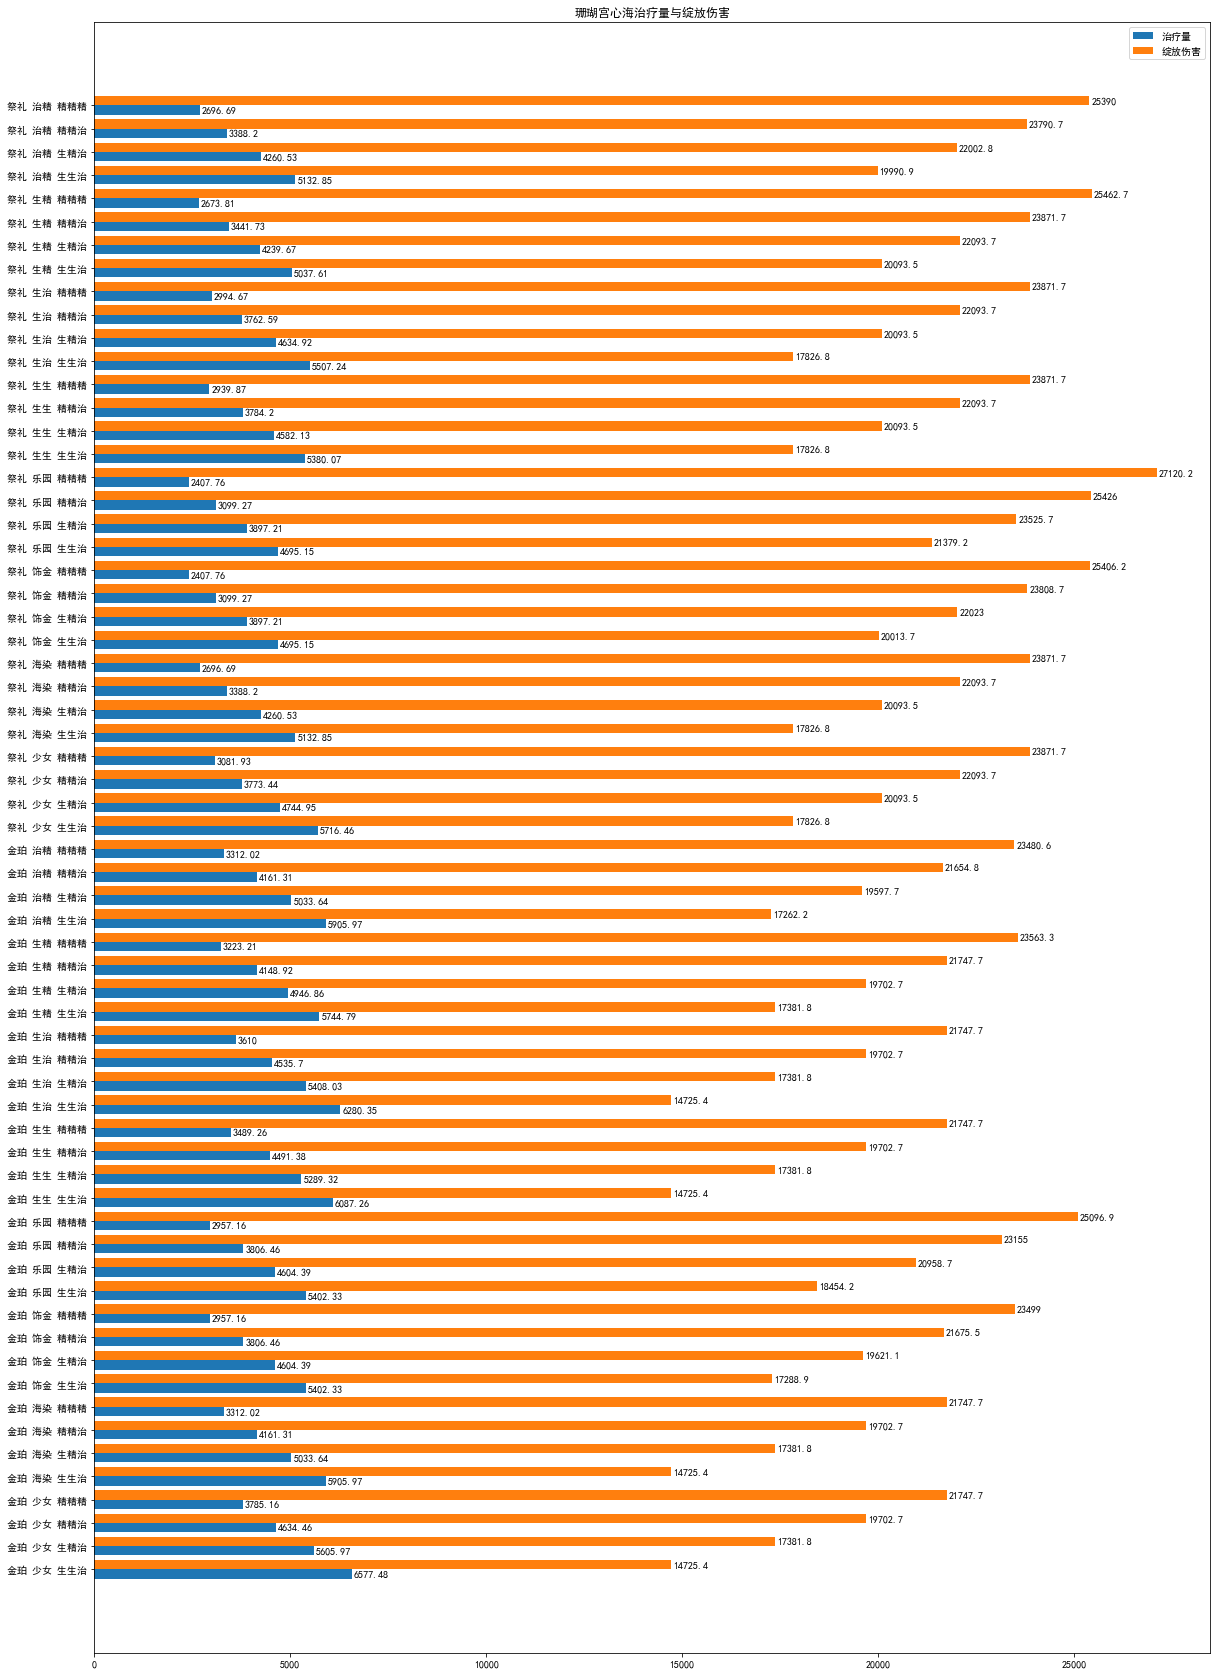

In [20]:
koTestYPos = np.arange(len(koTestTable))
koTestHealArr = []
koTestBloomArr = []
koTestLabelArr = []
for result in koTestTable:
    koTestHealArr.append(result[3])
    koTestBloomArr.append(result[4])
    koTestLabelArr.append(result[0])
plt.figure(figsize=(20, 30))
koTestBarWidth = 0.4
koTestHealBars = plt.barh(koTestYPos, koTestHealArr,
                          koTestBarWidth, label='治疗量')
plt.bar_label(koTestHealBars, padding=2)
koTestBloomBars = plt.barh(koTestYPos + koTestBarWidth,
                           koTestBloomArr, koTestBarWidth, label='绽放伤害')
plt.bar_label(koTestBloomBars, padding=2)
plt.yticks(koTestYPos + koTestBarWidth / 2, labels=koTestLabelArr)
plt.legend()
plt.title('珊瑚宫心海治疗量与绽放伤害')
plt.show()

##### 芭芭拉
- 基础生命值`9787`
- 11级元素战技治疗量`生命值上限 * 7.60%+914.89`

In [21]:
def barResultCompute(info):
    hp = 9787 * (1 + info[1])
    em = 586 + info[3]
    return (
        info[0],
        hp,
        em,
        (hp * 0.0143 + 171.54) * (1 + info[2]),
        (hp * 0.076 + 914.89) * (1 + info[2]),
        simpleWBloom(em, info[4])
    )


barTestTable = []
for w in bwTestWInfos1:
    for r in bwTestRInfos1:
        for s in bwTestRSubInfos1:
            barTestTable.append(barResultCompute(wrsInfoCompute(w, r, s)))
print(tabulate(barTestTable,
               headers=('装备(圣遗物副词条无效)', '生命值', '精通(战斗状态下)',
                        '攻击治疗量', '持续治疗量', '绽放伤害'),
               floatfmt='.3f',
               tablefmt='github'))

| 装备(圣遗物副词条无效)   |    生命值 |   精通(战斗状态下) |   攻击治疗量 |   持续治疗量 |   绽放伤害 |
|--------------------------|-----------|--------------------|--------------|--------------|------------|
| 金珀 少女 生生治         | 22950.515 |                586 |      854.043 |     4544.452 |  14725.379 |
| 金珀 少女 生精治         | 18389.773 |                773 |      742.584 |     3952.084 |  17381.846 |
| 金珀 少女 精精治         | 13829.031 |                960 |      631.125 |     3359.717 |  19702.665 |
| 金珀 少女 精精精         | 13829.031 |               1147 |      498.548 |     2653.960 |  21747.670 |
| 金珀 海染 生生治         | 22950.515 |                586 |      754.096 |     4012.626 |  14725.379 |
| 金珀 海染 生精治         | 18389.773 |                773 |      655.681 |     3489.582 |  17381.846 |
| 金珀 海染 精精治         | 13829.031 |                960 |      557.266 |     2966.538 |  19702.665 |
| 金珀 海染 精精精         | 13829.031 |               1147 |      424.689 |     2260.781 |  21747.670 |
| 金珀 饰金 生生治         | 22950.515 |       

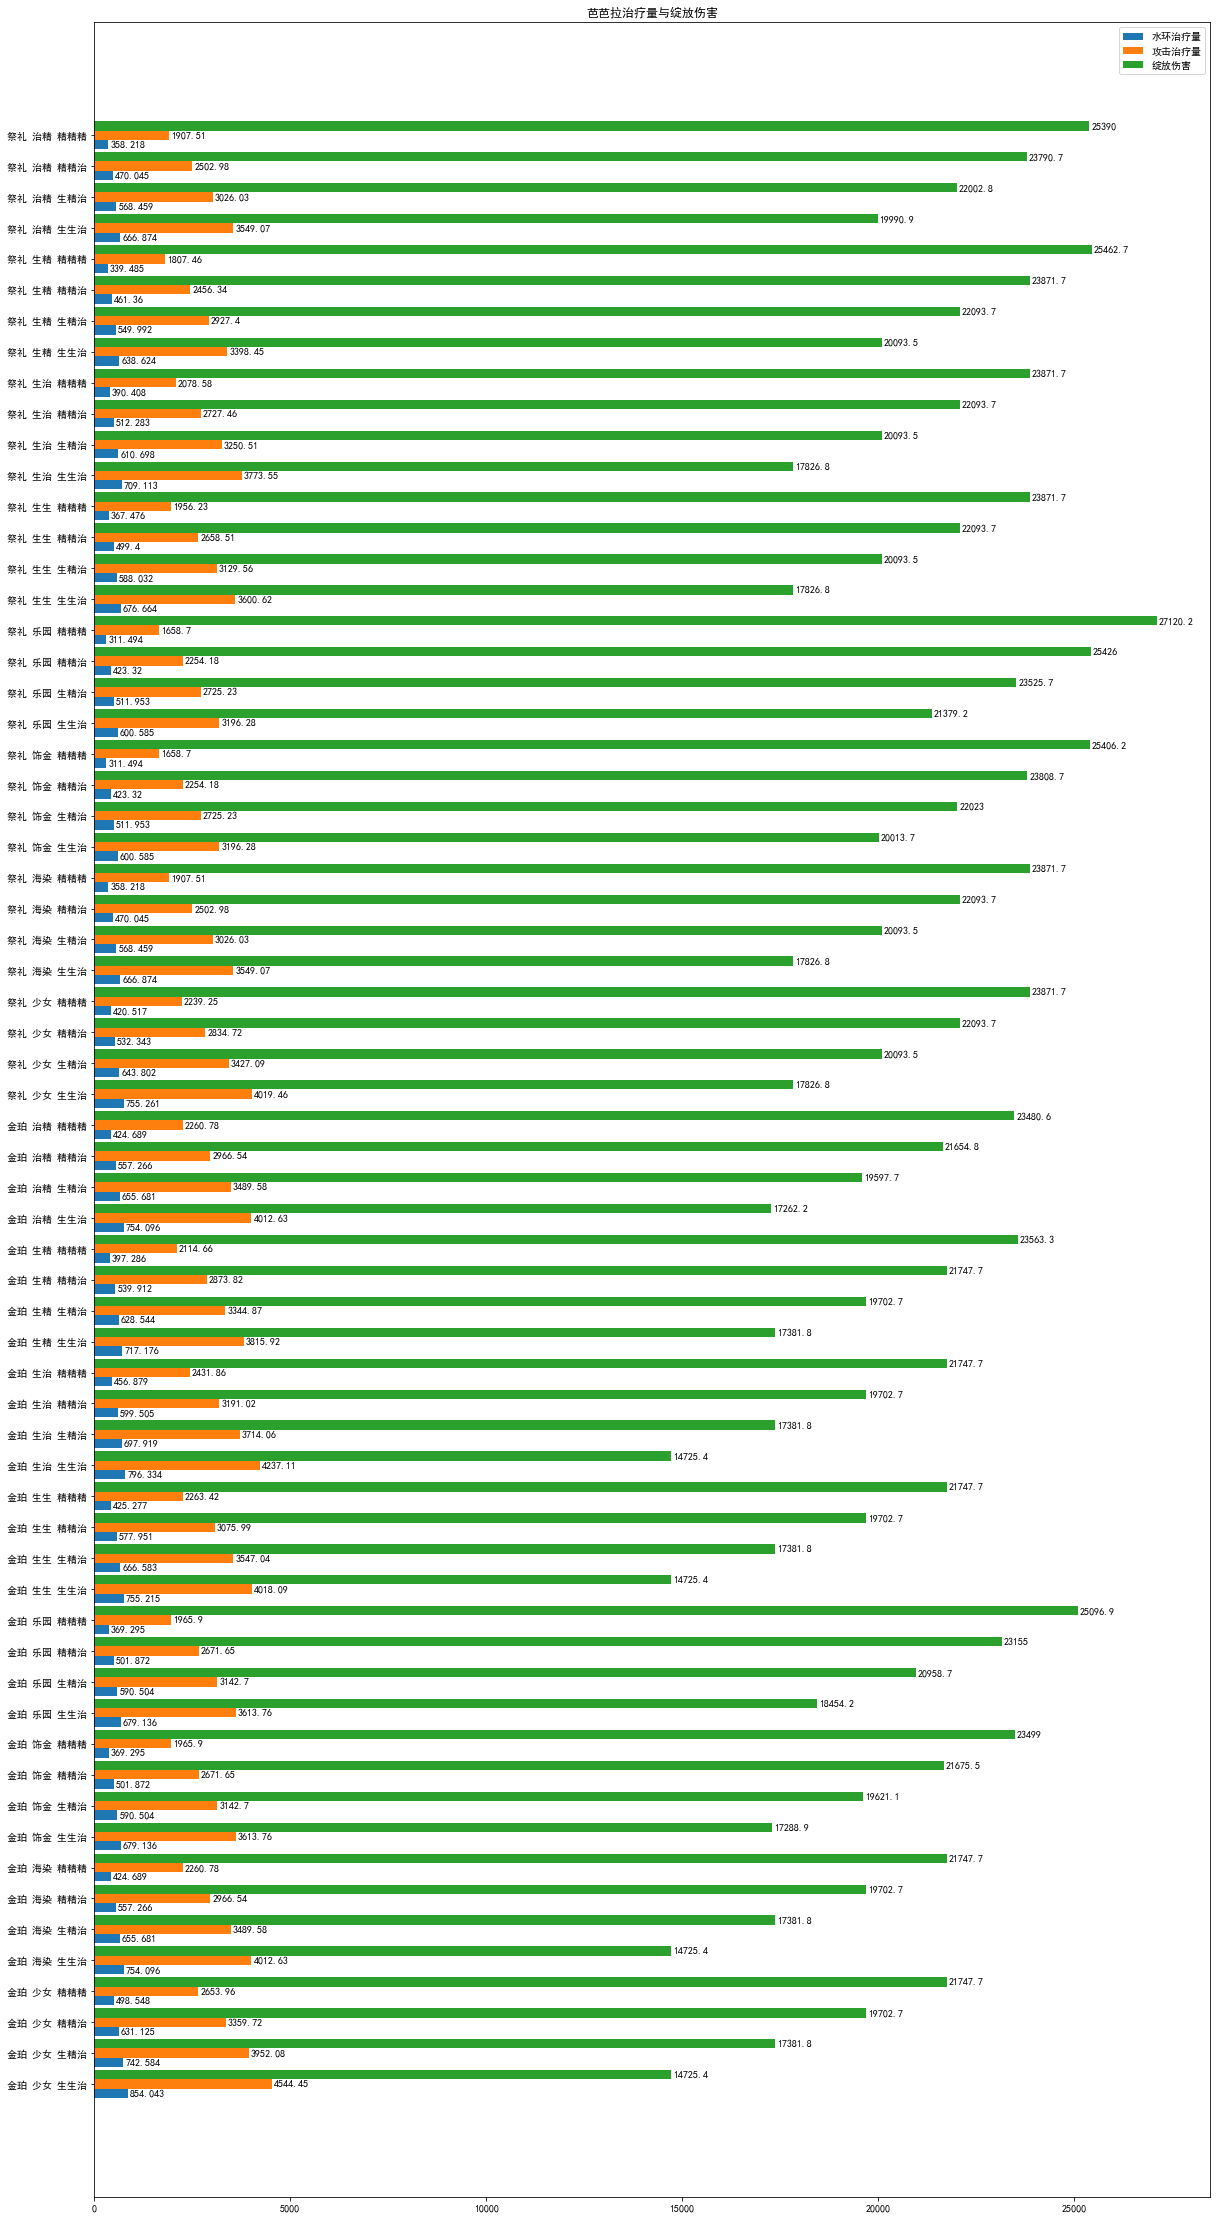

In [22]:
barTestYPos = np.arange(len(barTestTable))
barTestHealArr = []
barTestHeal2Arr = []
barTestBloomArr = []
barTestLabelArr = []
for result in barTestTable:
    barTestHealArr.append(result[3])
    barTestHeal2Arr.append(result[4])
    barTestBloomArr.append(result[5])
    barTestLabelArr.append(result[0])
plt.figure(figsize=(20, 40))
barTestBarWidth = 0.3
barTestHealBars = plt.barh(barTestYPos, barTestHealArr,
                           barTestBarWidth, label='水环治疗量')
plt.bar_label(barTestHealBars, padding=2)
barTestHeal2Bars = plt.barh(barTestYPos + barTestBarWidth,
                            barTestHeal2Arr, barTestBarWidth, label='攻击治疗量')
plt.bar_label(barTestHeal2Bars, padding=2)
barTestBloomBars = plt.barh(
    barTestYPos + barTestBarWidth * 2, barTestBloomArr, barTestBarWidth, label='绽放伤害')
plt.bar_label(barTestBloomBars, padding=2)
plt.yticks(barTestYPos + barTestBarWidth, labels=barTestLabelArr)
plt.title('芭芭拉治疗量与绽放伤害')
plt.legend()
plt.show()

*当然实际情况下妮露的水环依然会影响产种爆炸(由妮露造成的伤害)*

### 卡维  
战技可触发草种子,元素爆发绽放伤害加成,固有天赋1受伤回血、固有天赋2增加精通,命星1增加抗性和治疗量,命星2增加攻速,命星4绽放伤害加成,6命普攻可触发草种子绽放。  
很明显的草种子触发器定位,有一定的挂草能力(当然不如草神),在触发草种子爆炸后受伤回血,减轻治疗角色压力,使得治疗也可以纯堆精通或只关注治疗。  
满命提升明显,最好可以4命`60%`绽放伤害加成。  
武器大剑推荐选择活动精5武器`铁饰之花`
- 等级突破加成-精通`90`
- 固有天赋-精通`100 = 25 * 4`
- 命星4-绽放伤害加成`60%`
- 9级元素爆发-绽放伤害加成`46.7%`(技能持续12秒,技能冷却20秒)
- 武器-铁饰之花(精5)-精通`206 = 110 + 96`
- 双草共鸣-精通`80 = 50 + 30`

### 白术
定位：治疗、一点点的护盾(霸体抗打断)、挂草、绽放增伤
- 固有天赋-绽放伤害加成`100% = 50000 / 1000 * 2%`(需要50000血上限,对白术护盾治疗过的角色生效)

血量堆叠计算
- 基础血量: `13348`
- 武器: 金箔 生命值`+41.3%`
- 双水共鸣 生命值`+25%`
- 圣遗物方案: 生生治-生命值`+93.2% = 46.6% * 2`

In [23]:
print((50000 - 13348 * (1 + 0.413 + 0.25 + 0.466 * 2)) / 13348)

1.150879532514234


仍需要`115%`生命值加成,平均圣遗物子词条`23%`。  
如果圣遗物套装效果增加生命值`20%`或`20% + 20%`,则分别需要`95%(19%) 75%(15%)`  

生生生 生命2+2

In [24]:
print((50000 - 13348 * (1 + 0.413 + 0.25 + 0.466 * 3 + 0.2 * 2)) / 13348)

0.28487953251423437


非双水队伍中

In [25]:
print((50000 - 13348 * (1 + 0.413 + 0.466 * 3 + 0.2 * 2)) / 13348)

0.5348795325142344
